In [114]:
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
from scipy.stats import linregress


### Advertising vs Sales Data ###

In [115]:
x = np.array([23,26,30,34,43,48,52,57,58])
y = np.array([651,762,856,1063,1190,1298,1421,1440,1518])
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

slope: 23.422786, intercept: 167.682949
R-squared: 0.976713


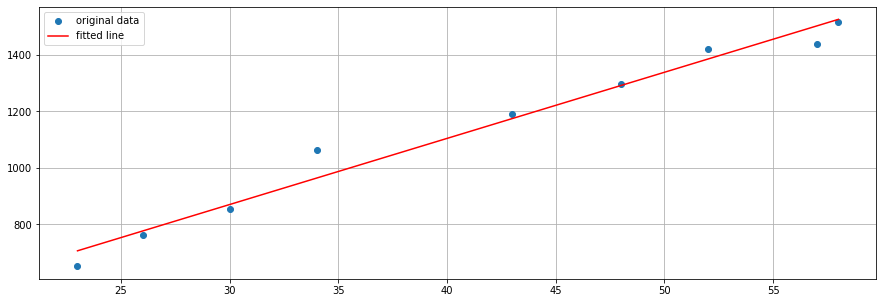

In [116]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.grid()
plt.show()

### Real time Stock Data analyisis ###

In [130]:

# fetch asset data
def getData(ticker, date_from, date_to):
    data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
    return data

In [131]:
date_from = datetime.date(2020, 3, 1)
date_to = datetime.date(2020, 4, 13)
df = getData('JNJ', date_from, date_to)
df.drop('Adj Close', axis=1, inplace=True)
df.tail()

,High,Low,Open,Close,Volume
Date,,,,,
2020-04-06,140.970001,135.539993,137.009995,139.759995,14994400
2020-04-07,142.029999,137.259995,139.860001,137.479996,11567100
2020-04-08,144.130005,137.300003,137.750000,143.259995,10758200
2020-04-09,145.419998,140.279999,144.009995,141.229996,11127200
2020-04-13,141.490005,137.839996,140.000000,139.770004,8153200


In [119]:
df_len = len(df)
df['Number'] = np.arange(df_len)+1
df_high = df.copy()
df_low = df.copy()
df.tail()


,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-04-06,140.970001,135.539993,137.009995,139.759995,14994400,26
2020-04-07,142.029999,137.259995,139.860001,137.479996,11567100,27
2020-04-08,144.130005,137.300003,137.750000,143.259995,10758200,28
2020-04-09,145.419998,140.279999,144.009995,141.229996,11127200,29
2020-04-13,141.490005,137.839996,140.000000,139.770004,8153200,30


In [120]:
while len(df_high)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_high['Number'], y=df_high['High'])
    df_high = df_high.loc[df_high['High'] > slope * df_high['Number'] + intercept]
    
df_high.tail()

,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-03-04,143.639999,137.139999,137.679993,143.479996,10560500,3
2020-04-09,145.419998,140.279999,144.009995,141.229996,11127200,29


In [121]:
while len(df_low)>2:
    slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Low'])
    df_low = df_low.loc[df_low['Low'] < slope * df_low['Number'] + intercept]
    
df_low.tail()

,High,Low,Open,Close,Volume,Number
Date,,,,,,
2020-03-23,118.559998,109.160004,117.000000,111.139999,20815200,16
2020-03-25,123.959999,116.699997,118.910004,119.400002,13986100,18


In [122]:
slope, intercept, r_value, p_value, std_err = linregress(x=df_high['Number'], y=df_high['Close'])
df['Uptrend'] = slope * df['Number'] + intercept
df.tail()

,High,Low,Open,Close,Volume,Number,Uptrend
Date,,,,,,,
2020-04-06,140.970001,135.539993,137.009995,139.759995,14994400,26,141.489611
2020-04-07,142.029999,137.259995,139.860001,137.479996,11567100,27,141.403073
2020-04-08,144.130005,137.300003,137.750000,143.259995,10758200,28,141.316534
2020-04-09,145.419998,140.279999,144.009995,141.229996,11127200,29,141.229996
2020-04-13,141.490005,137.839996,140.000000,139.770004,8153200,30,141.143457


In [123]:
slope, intercept, r_value, p_value, std_err = linregress(x=df_low['Number'], y=df_low['Close'])
df['Downtrend'] = slope * df['Number'] + intercept
df.tail()

,High,Low,Open,Close,Volume,Number,Uptrend,Downtrend
Date,,,,,,,,
2020-04-06,140.970001,135.539993,137.009995,139.759995,14994400,26,141.489611,152.440010
2020-04-07,142.029999,137.259995,139.860001,137.479996,11567100,27,141.403073,156.570011
2020-04-08,144.130005,137.300003,137.750000,143.259995,10758200,28,141.316534,160.700012
2020-04-09,145.419998,140.279999,144.009995,141.229996,11127200,29,141.229996,164.830013
2020-04-13,141.490005,137.839996,140.000000,139.770004,8153200,30,141.143457,168.960014


In [124]:
from pandas.plotting import register_matplotlib_converters

In [125]:
register_matplotlib_converters()

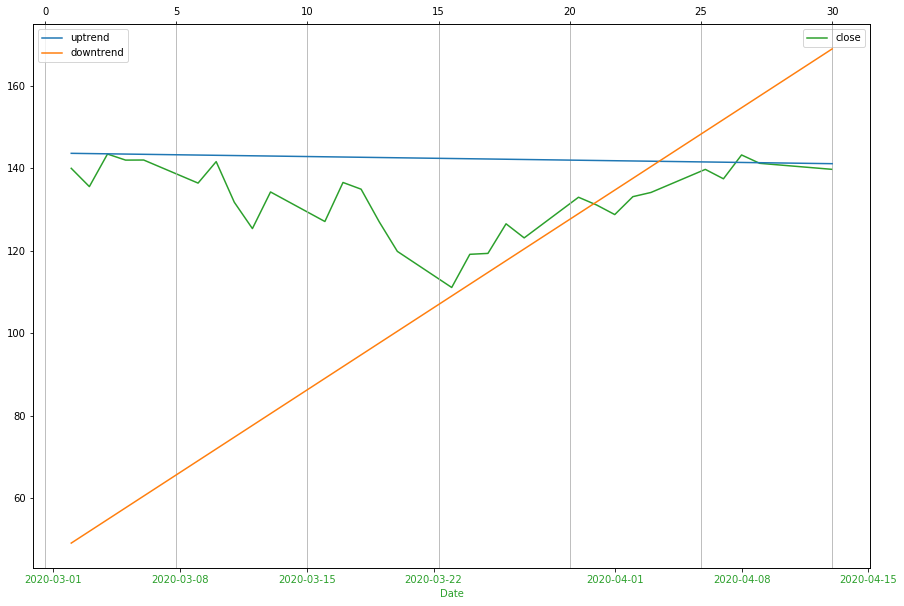

In [126]:
# draw the closing price and related trendlines (uptrend and downtrend)
fig, ax1 = plt.subplots(figsize=(15,10))

color = 'tab:green'
xdate = [x.date() for x in df.index]
ax1.set_xlabel('Date', color=color)
ax1.plot(xdate, df.Close, label="close", color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.legend()

ax2 = ax1.twiny() # ax2 and ax1 will have common y axis and different x axis, twiny
ax2.plot(df.Number, df.Uptrend, label="uptrend")
ax2.plot(df.Number, df.Downtrend, label="downtrend")

plt.legend()
plt.grid()
plt.show()